# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1281]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    """
    Abstract class to support search/insert operations (plus underlying data structure)
    
    """
        
    @abstractmethod
    def insertElement(self, element):     
        """
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        """
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        """
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        """

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [1282]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class TwoThreeNode:

    def __init__(self, keys:list) -> None:
        self.keys = keys
        self.children = [None for i in range(len(keys) + 1)]

    def find(self, element) -> bool:
        for i, key in enumerate(self.keys):
            if element == key:
                return True
            if element < key:
                break
        else:
            i += 1

        return self.children[i] is not None and self.children[i].find(element)

    def put(self, element) -> bool:
        for i, key in enumerate(self.keys):
            if element == key:
                return False
            if element < key:
                break
        else:
            i += 1

        if self.children[i] is None:
            self.keys.insert(i, element)
            self.children.insert(i, None)
            return True
        
        if not self.children[i].put(element): 
            return False
        
        if len(self.children[i].keys) <= 2:
            return True
        
        node_to_split = self.children[i]
        self.keys.insert(i, node_to_split.keys[1])
        self.children.insert(i, TwoThreeNode([node_to_split.keys[0]]))
        self.children[i].children = node_to_split.children[:2]
        self.children[i + 1] = TwoThreeNode([node_to_split.keys[2]])
        self.children[i + 1].children = node_to_split.children[2:]
        
        return True

class BTreeNode:
    def __init__(self, t, is_leaf=True):
        self.t = t
        self.is_leaf = is_leaf
        self.keys = []
        self.children = []

    def is_full(self):
        return len(self.keys) == 2 * self.t - 1

class LLRBNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value

        self.left = None
        self.right = None

        self.isRed = True  

    def rotateLeft(self):
        newParent = self.right
        self.right = newParent.left
        newParent.left = self
        newParent.isRed = self.isRed
        self.isRed = True

        return newParent

    def rotateRight(self):
        newParent = self.left
        self.left = newParent.right
        newParent.right = self
        newParent.isRed = self.isRed
        self.isRed = True

        return newParent

    def colourFlip(self) -> None:
        self.left.isRed = False
        self.right.isRed = False
        self.isRed = True

    def find(self, element: str) -> bool:
        if self is None:
            return False
        
        if element == self.key: 
            return True
        elif element < self.key:
            return self.left and self.left.find(element) or False
        elif element > self.key:
            return self.right and self.right.find(element) or False
        
    def put(self, element: str):
        if self is None:
            return LLRBNode(element, None), True

        inserted = False
        if element > self.key:
            if self.right is None:
                self.right = LLRBNode(element, None)
                inserted = True
            else:
                self.right, inserted = self.right.put(element)
        elif element < self.key:
            if self.left is None:
                self.left = LLRBNode(element, None)
                inserted = True
            else:
                self.left, inserted = self.left.put(element)
        elif element == self.key:
            return self, False

        if inserted:
            if (self.right is not None and self.right.isRed) and (self.left is None or not self.left.isRed):
                self = self.rotateLeft()
            if (self.left is not None and self.left.isRed) and (self.left.left is not None and self.left.left.isRed):
                self = self.rotateRight()
            if (self.left is not None and self.left.isRed) and (self.right is not None and self.right.isRed):
                self.colourFlip()
    
        return self, inserted

Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [1283]:
class TwoThreeTree(AbstractSearchInterface):
    
    def __init__(self) -> None:
        self.root = None

    def insertElement(self, element):
        if self.root is None:
            self.root = TwoThreeNode([element])
            return True
        
        if not self.root.put(element): 
            return False
        
        if len(self.root.keys) <= 2:
            return True
        
        left = TwoThreeNode([self.root.keys[0]])
        left.children = self.root.children[:2]

        right = TwoThreeNode([self.root.keys[2]])
        right.children = self.root.children[2:]
        
        self.root = TwoThreeNode([self.root.keys[1]])
        self.root.children = [left, right]

        return True

    def searchElement(self, element):     
        return self.root is not None and self.root.find(element) 

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [1284]:
class AVLTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [1285]:
class LLRBBST(AbstractSearchInterface):
    def __init__(self) -> None:
        self.root = None

    def insertElement(self, element: str) -> bool:
        if self.root is None:
            self.root = LLRBNode(element, None)
            self.root.isRed = False
            return True

        self.root, inserted = self.root.put(element)
        self.root.isRed = False 
        return inserted

    def searchElement(self, element: str) -> bool: 
        if self.root is None:
            return False    
        return self.root.find(element)

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [1286]:
class BTree(AbstractSearchInterface):
    def __init__(self, t=2):
        self.root = BTreeNode(t, True)
        self.t = t
    
    def searchElement(self, element):
        if self.root is None:
            return False
        return self._search_node(self.root, element)
    
    def _search_node(self, node, element):
        i = 0
        while i < len(node.keys) and element > node.keys[i]:
            i += 1
        
        if i < len(node.keys) and element == node.keys[i]:
            return True
        
        if node.is_leaf:
            return False
        
        return self._search_node(node.children[i], element)
    
    def insertElement(self, element):
        if self.searchElement(element):
            return False
            
        root = self.root
        
        if root.is_full():
            new_root = BTreeNode(self.t, False)
            new_root.children.append(self.root)
            self._split_child(new_root, 0)
            self.root = new_root
            self._insert_non_full(self.root, element)
        else:
            self._insert_non_full(root, element)
            
        return True
    
    def _split_child(self, parent, index):
        t = self.t
        y = parent.children[index]
        z = BTreeNode(t, y.is_leaf)
        
        middle_key = y.keys[t-1]
        
        z.keys = y.keys[t:]
        y.keys = y.keys[:t-1]
        
        if not y.is_leaf:
            z.children = y.children[t:]
            y.children = y.children[:t]
        
        parent.children.insert(index + 1, z)
        parent.keys.insert(index, middle_key)
    
    def _insert_non_full(self, node, element):
        i = len(node.keys) - 1
        
        if node.is_leaf:
            while i >= 0 and element < node.keys[i]:
                i -= 1
            node.keys.insert(i + 1, element)
        else:
            while i >= 0 and element < node.keys[i]:
                i -= 1
            i += 1
            
            if len(node.children[i].keys) == (2 * self.t - 1):
                self._split_child(node, i)
                
                if element > node.keys[i]:
                    i += 1
            
            self._insert_non_full(node.children[i], element)

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [1287]:
class ScapegoatTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found 

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [1288]:
import string
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    Attributes:
        min_length (int):
            Minimum (inclusive) length of the strings produced by 
            generator methods. Non-negative.  

        max_length (int):
            Maximum (inclusive) length of the strings produced by 
            generator methods. Greater than or equal to min_length. 
             
        alphabet (str):
            The set of characters to choose from  when generating 
            strings.  

            
    Methods:
        data_generator(num_str: int):
            A generator which yields `num_str` number of generated 
            strings.
    """

    min_length = 0
    max_length = 0
    alphabet = string.ascii_letters + string.digits
    
    
    def __init__(self, seed: int, min_length: int, max_length: int):
        """
        Parameters:
            min_length (int): 
                Minimum (inclusive) length of the strings produced by 
                generators. Non-negative.
            
            max_length (int): 
                Maximum (inclusive) length of the strings produced by 
                generators.
        """

        if min_length < 1:
            raise ValueError("Minimum length must be a positive integer.")
        self.min_length = min_length

        if max_length < self.min_length:
            raise ValueError("Maximum length must be greater than or equal to "
            "minimum length.")
        self.max_length = max_length
    

    def data_generator(self, num_str: int):
        """
        A generator which yields `num_str` number of strings.

        Parameters:
            num_str (int): 
                The number of random strings to yield. Non-negative.
        """

        raise NotImplementedError("data_generator() not implemented.")
        


class UniformTestDataGenerator(TestDataGenerator):
    """
    A uniformly random synthetic data generator class.

    Attributes:
        min_length (int):
            Minimum (inclusive) length of the strings produced by 
            generator methods. Non-negative.  

        max_length (int):
            Maximum (inclusive) length of the strings produced by 
            generator methods. Greater than or equal to `min_length`. 
             
        seed (int):
            Seed for the random number generator.

        alphabet (str):
            The set of characters to choose from  when generating 
            strings.  

            
    Methods:
        data_generator(num_str: int):
            A generator which yields `num_str` number of uniformly 
            generated random strings in an unsorted order.
    """

    seed = 0

    def __init__(self, min_length: int, max_length: int, seed: int,
                 alphabet_size = 62):
        """
        Parameters:
            min_length (int): 
                Minimum (inclusive) length of the strings produced by 
                generators. Non-negative.
            
            max_length (int): 
                Maximum (inclusive) length of the strings produced by 
                generators.  

            seed (int):
                Seed for the random number generator.
            
            alphabet_size (int): 
                The size of the alphabet to choose, from [1, 62].
        """

        super().__init__(self, min_length, max_length)
        
        self.seed = seed

        if alphabet_size < 1 or alphabet_size > 62:
            raise ValueError("Alphabet size must be in the interval [1,62].")
        random.seed(self.seed)
        self.alphabet = random.sample(self.alphabet, k = alphabet_size)


    def data_generator(self, num_str):
        """
        A generator which yields `num_str` number of uniformly random 
        strings in a sorted order.

        Does not ensure non-duplicate strings.

        Parameters:
            num_str (int): 
                The number of random strings to yield. Non-negative.
        """

        if num_str < 0:
            raise ValueError("Number of strings generated must be a "
            "non-negative integer.")

        for i in range(0, num_str):
            random.seed(self.seed + i)
            length = random.randrange(self.min_length, self.max_length + 1)
            yield ''.join(random.choices(self.alphabet, k = length))



class SortedTestDataGenerator(UniformTestDataGenerator):
    """
    A sorted random synthetic data generator class.

    Attributes:
        seed (int):
            Seed for the random number generator.

        min_length (int):
            Minimum (inclusive) length of the strings produced by 
            generator methods. Non-negative.  

        max_length (int):
            Maximum (inclusive) length of the strings produced by 
            generator methods. Greater than or equal to `min_length`. 
             
        alphabet (str):
            The set of characters to choose from  when generating 
            strings.  

        ascending (bool):
            If True, generates strings in ascending order.
            If False, generates strings in descending order.

            
    Methods:
        data_generator(num_str: int):
            A generator which yields `num_str` number of uniformly 
            generated random strings in a sorted order.
    """
    
    ascending = True
    
    def __init__(self, min_length: int, max_length: int, seed: int,
                 alphabet_size = 62, ascending = True):
        """
        Parameters:
            min_length (int): 
                Minimum (inclusive) length of the strings produced by 
                generators. Non-negative.
            
            max_length (int): 
                Maximum (inclusive) length of the strings produced by 
                generators.  
            
            seed (int):
                Seed for the random number generator.

            alphabet_size (int): 
                The size of the alphabet to choose, from [1, 62].

            ascending (bool): 
                If True, generates strings in ascending order.\n
                If False, generates strings in descending order.
        """
        
        super().__init__(min_length, max_length, seed, alphabet_size)
        
        self.ascending = ascending
    

    def data_generator(self, num_str):
        """
        A generator which yields `num_str` number of random strings in a 
        sorted order.

        Does not ensure non-duplicate strings.

        Parameters:
            num_str (int): 
                The number of random strings to yield. Non-negative.
        """

        strs = [string for string in super().data_generator(num_str)]
        strs.sort(reverse = not self.ascending)
        
        for string in strs:
            yield string



class SlopedTestDataGenerator(SortedTestDataGenerator):
    """
    A distributed random synthetic data generator class.

    Attributes:
        min_length (int):
            Minimum (inclusive) length of the strings produced by 
            generator methods. Non-negative.  

        max_length (int):
            Maximum (inclusive) length of the strings produced by 
            generator methods. Greater than or equal to `min_length`. 
             
        seed (int):
            Seed for the random number generator.
        
        alphabet (str):
            The set of characters to choose from  when generating 
            strings. 

        ascending (bool):
            If True, generates strings in order starting with the sorted
            smallest, moving to the largest, and back to smallest.
            If False, generates strings in order starting with the 
            sorted largest, moving to the smallest, and back to largest.
            I.e. the data slopes upwards and then down, or downwards 
            and then up again.

            
    Methods:
        data_generator(num_str: int):
            A generator which yields `num_str` number of uniformly 
            generated random strings in a sloped order.
    """

    def __init__(self, min_length: int, max_length: int, seed: int,
                 alphabet_size = 62, ascending = True):
        """
        Parameters:
            min_length (int): 
                Minimum (inclusive) length of the strings produced by 
                generators. Non-negative.
            
            max_length (int): 
                Maximum (inclusive) length of the strings produced by 
                generators.  

            seed (int):
                Seed for the random number generator.
            
            alphabet_size: 
                The size of the alphabet to choose, from [1, 62].

            ascending (bool): 
                If True, the largest (relative to the sorted order) 
                strings are distributed evenly around the yielded data 
                stream's midpoint, and the smallest at the endpoints.\n
                If False, the smallest strings are distributed evenly 
                around the yielded data stream's midpoint, and the 
                largest at the endpoints.
                I.e. the data slopes upwards and then down, or downwards
                and then up again.
        """
        
        super().__init__(min_length, max_length, seed, alphabet_size, 
                         ascending)


    def data_generator(self, num_str):
        """
        A generator which yields `num_str` number of random strings in a 
        sloped order.
        
        Parameters:
            num_str (int): 
                The number of random strings to yield. Non-negative.
        """
        
        offset = num_str % 2
        strs = [string for string in super().data_generator(num_str)]
        
        for i in range(0, len(strs), 2):
            yield strs[i]

        for i in range(1, len(strs), 2):
            yield strs[-(i + offset)]



class DivergingTestDataGenerator(SortedTestDataGenerator):
    """
    A distributed random synthetic data generator class.

    Attributes:
        min_length (int):
            Minimum (inclusive) length of the strings produced by 
            generator methods. Non-negative.  

        max_length (int):
            Maximum (inclusive) length of the strings produced by 
            generator methods. Greater than or equal to `min_length`. 
             
        seed (int):
            Seed for the random number generator.
        
        alphabet (str):
            The set of characters to choose from  when generating 
            strings. 

            
    Methods:
        data_generator(num_str: int):
            A generator which yields `num_str` number of uniformly 
            generated random strings in a sloped order.
    """

    def __init__(self, min_length: int, max_length: int, seed: int,
                 alphabet_size = 62):
        """
        Parameters:
            min_length (int): 
                Minimum (inclusive) length of the strings produced by 
                generators. Non-negative.
            
            max_length (int): 
                Maximum (inclusive) length of the strings produced by 
                generators.  

            seed (int):
                Seed for the random number generator.
            
            alphabet_size: 
                The size of the alphabet to choose, from [1, 62].
        """
        
        super().__init__(min_length, max_length, seed, alphabet_size, True)


    def data_generator(self, num_str):
        """
        A generator which yields `num_str` number of random strings in a 
        diverging order.
        
        Parameters:
            num_str (int): 
                The number of random strings to yield. Non-negative.
        """
        
        strs = [string for string in super().data_generator(num_str)]
        
        for i in range(0, len(strs) // 2, 1):
            yield strs[i]
            yield strs[-(i + 1)]

        if len(strs) % 2 != 0:
            yield strs[len(strs) // 2]


Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [1289]:
import math # Mentioned on Moodle it was allowed. I've only used it for error bars I think, has no effect on anything else.
import timeit
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

class ExperimentalFramework():
    """
    A class to represent an experimental framework for testing and 
    analysing the time performance of different implementations of 
    AbstractSearchInterface, using data streams generated by provided 
    instances of TestDataGenerator.

    This framework provides methods to run insertion, search, and 
    cumulative insertion experiments on the data structures, and plot 
    the results with several options.

    All recorded data is measured in seconds.

    Methods:
        run_insertion_experiment(
            num_str: int, repeats: int, generator: TestDataGenerator, 
            structure: type[AbstractSearchInterface]) 
            -> list[list[float]]:

           A method which returns the times taken to insert an nth 
           string into an instance of `structure`, for `repeats` 
           repeats.

    run_search_experiment(
        num_str: int, repeats: int, insert_generator: TestDataGenerator, 
        search_generator: TestDataGenerator, 
        structure: type[AbstractSearchInterface], step: int) 
        -> list[list[float]]:
        
        A method which returns the times taken to search an instance of 
        `structure` for some string key, after inserting an nth string 
        into the instance, for `repeats` repeats.

    run_cumulative_insertion_experiment(
        num_strs: list[int], repeats: int, generator: TestDataGenerator, 
        structure: type[AbstractSearchInterface]) -> list[list[float]]:
       
        A method which returns the times taken to insert each amount of
        each element of `num_strs` strings into an instance of 
        `structure`, for `repeats` repeats.


    plot_experiment_results(
        experiment_results: list[list[list[float]]], 
        trees_used: list[type[AbstractSearchInterface]], 
        num_strs: list[int], test_type: str, data_generation_type: str, 
        x_tick_spacing: int, pruning: bool = True) -> None:
        
        A method to plot the results of the same experiment on many 
        trees.
        Includes error bars for the standard deviation at each point.
    """

    @staticmethod
    def run_insertion_experiment(num_str: int, repeats: int,
                                 generator: TestDataGenerator, 
                                 structure: type[AbstractSearchInterface]
                                 ) -> list[list[float]]:
        """
        A method which returns the times taken to insert an nth string 
        into an instance of `structure`, for `repeats` repeats.

        The time taken is measured in seconds.

        Parameters:
            num_str (int):
                The total number of strings to be inserted into each 
                structure.
            
            repeats (int):
                The number of times to repeat the experiment.
            
            generator (TestDataGenerator):
                A generator instance used to yield the inserted strings.
            
            structure (AbstractSearchInterface):
                The data structure class type to be tested.

        Returns:
            A list of lists, where each list is the times taken for each 
            repeat of the experiment, and in each list the times taken 
            to insert the nth element, for the index of n - 1 in the 
            list. Measured in seconds.
        """

        if not isinstance(generator, TestDataGenerator):
            raise ValueError("generator must be an instance of "
            "TestDataGenerator.")

        if not issubclass(structure, AbstractSearchInterface):
            raise ValueError("structure must be a subclass of "
            "AbstractSearchInterface.")

        repeats_list = []

        for r in range(0, repeats):
            test_struct = structure()
            times = []

            for string in generator.data_generator(num_str):
                start = timeit.default_timer()
                test_struct.insertElement(string)
                end = timeit.default_timer()

                times.append(end - start)

            repeats_list.append(times)

        return repeats_list


    @staticmethod
    def run_search_experiment(num_str: int, repeats: int,
                              insert_generator: TestDataGenerator,
                              search_generator: TestDataGenerator,
                              structure: type[AbstractSearchInterface],
                              step: int 
                              ) -> list[list[float]]:
        """
        A method which returns the times taken to search an instance of 
        `structure` for some string key, after inserting an nth string 
        into the instance, for `repeats` repeats.

        The time taken is measured in seconds.

        Parameters:
            num_str (int):
                The total number of strings to be inserted into each 
                structure.

            repeats (int):
                The number of times to repeat the experiment.

            insert_generator (TestDataGenerator):
                A generator instance used to yield the inserted strings.

            search_generator (TestDataGenerator):
                A generator instance used to yield the searched strings.
                Must be a different instance to `insert_generator`.    
                
            structure (AbstractSearchInterface):
                The data structure class type to be tested.

            step (int):
                How often to sample the time taken to search for an 
                item. I.e. samples every after inserting every `step`th 
                element.

        Returns:
            list[list[float]]:
                - The outer lists correspond to repeats.
                - The inner lists contains the times taken to search 
                after inserting the nth element, for the index of n - 1 
                in the list. Measured in seconds.
        """

        if not isinstance(insert_generator, TestDataGenerator):
            raise ValueError("insert_generator must be an instance of "
            "TestDataGenerator.")
        
        if not isinstance(search_generator, TestDataGenerator):
            raise ValueError("search_generator must be an instance of "
            "TestDataGenerator.")

        if insert_generator is search_generator:
            raise ValueError("insert_generator and search_generator must be "
            "different instances. Consider initialising a clone of the "
            "generator.")
        
        if not issubclass(structure, AbstractSearchInterface):
            raise ValueError("structure must be a subclass of "
            "AbstractSearchInterface.")

        repeats_list = []

        for r in range(0, repeats):
            test_struct = structure()
            times = []

            search_gen = search_generator.data_generator(num_str // step)
            
            for i, insert_str in enumerate(
                insert_generator.data_generator(num_str)):

                if i % step == 0:
                    start = timeit.default_timer()
                    test_struct.searchElement(next(search_gen))
                    end = timeit.default_timer()
                    times.append(end - start)
                
                test_struct.insertElement(insert_str)

            repeats_list.append(times)

        return repeats_list


    @staticmethod
    def run_cumulative_insertion_experiment(
        num_strs: list[int], repeats: int, generator: TestDataGenerator, 
        structure: type[AbstractSearchInterface]) -> list[list[float]]:
        """
        A method which returns the times taken to insert each amount of
        each element of `num_strs` strings into an instance of 
        `structure`, for `repeats` repeats.

        The time taken is measured in seconds.

        Parameters:
            num_strs (list[int]):
                The total number of strings to be inserted into each 
                structure.
            
            repeats (int):
                The number of times to repeat the experiment.
            
            generator (TestDataGenerator):
                A generator instance used to yield the inserted strings.
            
            structure (AbstractSearchInterface):
                The data structure class type to be tested.

        Returns:
            list[list[float]]:
                - The outer lists correspond to repeats.
                - The inner lists contains the times for each string 
                  cumulative insertion operation in seconds.
        """

        if not isinstance(generator, TestDataGenerator):
            raise ValueError("generator must be an instance of "
            "TestDataGenerator.")

        if not issubclass(structure, AbstractSearchInterface):
            raise ValueError("structure must be a subclass of "
            "AbstractSearchInterface.")

        repeats_list = []

        for r in range(0, repeats):
            test_struct = structure()
            times = []
            current_index = 0

            # Initialisation overhead removed from the for loop.
            insert_gen = generator.data_generator(num_strs[-1] + 1)
            # Requires disposing the first element.
            next(insert_gen)
            
            start = timeit.default_timer()
            for i, string in enumerate(insert_gen):
                test_struct.insertElement(string)
                if i + 1 == num_strs[current_index]:
                    end = timeit.default_timer()
                    times.append(end - start)
                    current_index += 1
                    start = timeit.default_timer()

            repeats_list.append(times)

        return repeats_list
    

    @staticmethod
    def __calc_mean(data: list[float]):
        return sum(data) / len(data)
    
    
    @staticmethod
    def __calc_median(data: list[float]):
        dataCopy = data.copy()
        dataCopy.sort()
        if len(data) % 2 != 0:
            return dataCopy[len(data) // 2]
        else:
            return (dataCopy[len(data) // 2 - 1] + dataCopy[len(data) // 2]) / 2

    
    @staticmethod
    def __calc_standard_deviation(data: list[float]):
        mean = ExperimentalFramework.__calc_mean(data)

        variance = 0
        for d in data:
            variance += (d - mean) ** 2
        return math.sqrt(variance / len(data))


    def __prune_outliers(data, thresh = 1.1):
        """
        Removes outliers from the data using the Median Absolute 
        Deviation (MAD) method.

        Parameters:
            data (list[list[float]]): 
                A list of lists, where each inner list contains the data
                points for a specific input size across repeats.

            thresh (float): 
                The threshold for outlier detection. Points with a 
                deviation greater than this threshold are considered 
                outliers.

        Returns:
            list[list[float]]: 
                A list of result repeats with outliers removed.
        """

        pruned_data = []

        for point in data:
            # Calculate the median of the current point.
            median = ExperimentalFramework.__calc_median(list(point))

            # Calculate the Median Absolute Deviation (MAD).
            abs_devs = [abs(elem - median) for elem in point]
            mad = ExperimentalFramework.__calc_median(abs_devs)

            # Prune outliers based on the threshold.
            pruned_point = []
            for elem in point:
                if mad == 0 or abs(elem - median) / mad <= thresh:
                    pruned_point.append(elem)

            pruned_data.append(pruned_point)

        return pruned_data


    @staticmethod
    def plot_experiment_results(experiment_results: list[list[list[float]]],
                                trees_used: list[type[AbstractSearchInterface]],
                                num_strs: list[int], test_type: str, 
                                data_generation_type: str,
                                x_tick_spacing: int, pruning = True) -> None:
        """
        A method to plot the results of the same experiment on many 
        trees.

        Includes error bars for the standard deviation at each point.

        Parameters:
            experiment_results (list[list[list[float]]]):
                A list of lists of lists, where:
                - The outer list corresponds to different trees.
                - The middle lists correspond to repeats for each tree.
                - The innermost lists contains the times for each string 
                  (cumulative) insertion or search operation in seconds.

            trees_used (list[type[AbstractSearchInterface]]):
                A list of the tree class types used in the experiment.
                The order of the list must match the order of their 
                results in `experiment_results`.

            num_strs (list[int]):
                The total number of strings corresponding to each 
                experiment result, must be the same for each experiment.

            test_type (str):
                The type of test being performed, either "Insertion", 
                "Cumulative Insertion" or "Search". Inserted on labels.

            data_generation_type (str):
                The type of data generation used in the test. Added to 
                the graph's title.

            x_tick_spacing (int):
                The spacing for each x-axis marker/tick, starting at 0.

            pruning (bool):
                If True, enables outlier pruning.
        """

        for tree_results in experiment_results:
            if len(tree_results[0]) != len(num_strs):
                raise ValueError("The number of strings inserted must be the "
                "same for each tree, and correspond to num_strs.") 

        fig, ax = plt.subplots()
        fig.set_figwidth(12)

        max_avg_time = -1
        min_avg_time = float('inf')

        for tree_results, tree_type in zip(experiment_results, trees_used):
            if pruning:
                results = ExperimentalFramework.__prune_outliers(
                    list(zip(*tree_results)))
            else:
                results = zip(*tree_results)


            y_std_devs = [
                ExperimentalFramework.__calc_standard_deviation(point)
                for point in results
            ]
            
            avg_times = [
                ExperimentalFramework.__calc_mean(point) 
                for point in results
            ]
            
            line, caps, bars = ax.errorbar(x=num_strs, y=avg_times, 
                                           yerr=y_std_devs, elinewidth=0.5,
                                           capsize=1)
            
            if max(avg_times) > max_avg_time:
                max_avg_time = max(avg_times)
            if min(avg_times) < min_avg_time:
                min_avg_time = min(avg_times)
            
            line.set_label(tree_type.__name__)
            line.set_linewidth(1)

        ax.set_title(f"{test_type} Time vs Number of Strings Inserted for a "
                     + f"{data_generation_type} Data Distribution")
        ax.legend()

        ax.set_xlabel("Number of Strings in Structure")
        ax.set_ylabel(f"Average {test_type} Time Taken / s")
        ax.set_xlim(0, num_strs[-1] + x_tick_spacing)
        ax.set_ylim(min_avg_time*0.9, max_avg_time*1.1)
        
        ax.set_xticks([x for x in range(0, num_strs[-1] + x_tick_spacing,
                                        x_tick_spacing)])
        
        ax.spines[['left']].set_position('zero')
        ax.spines[['bottom']].set_position(('data', min_avg_time*0.9))
        ax.spines[['top', 'right']].set_visible(False)

        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
        
        plt.show()
        
        

    
        
    

Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

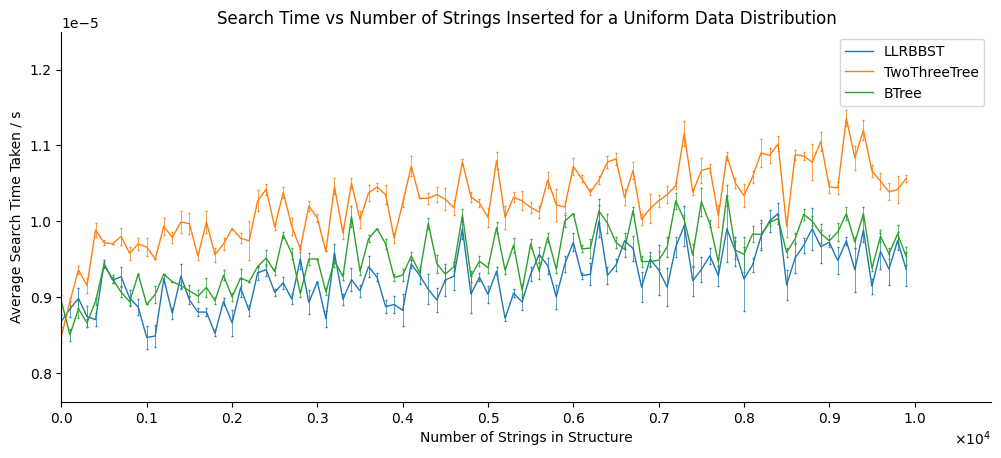

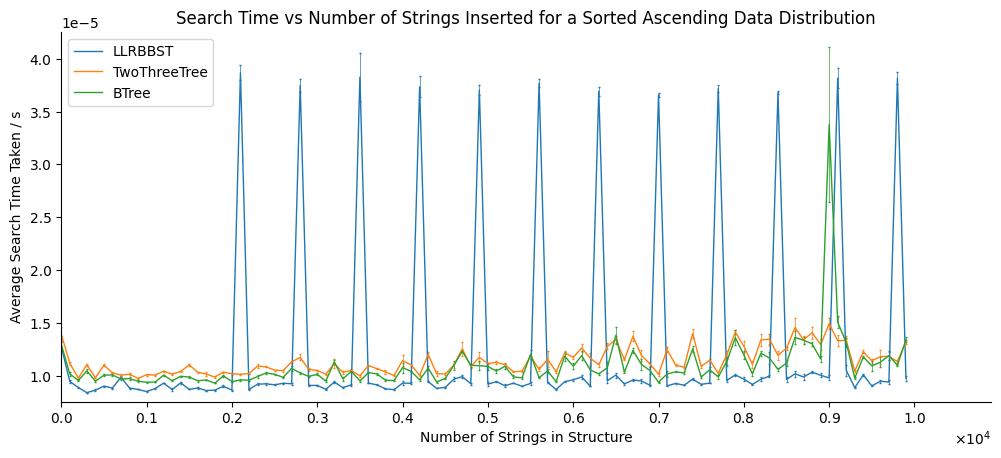

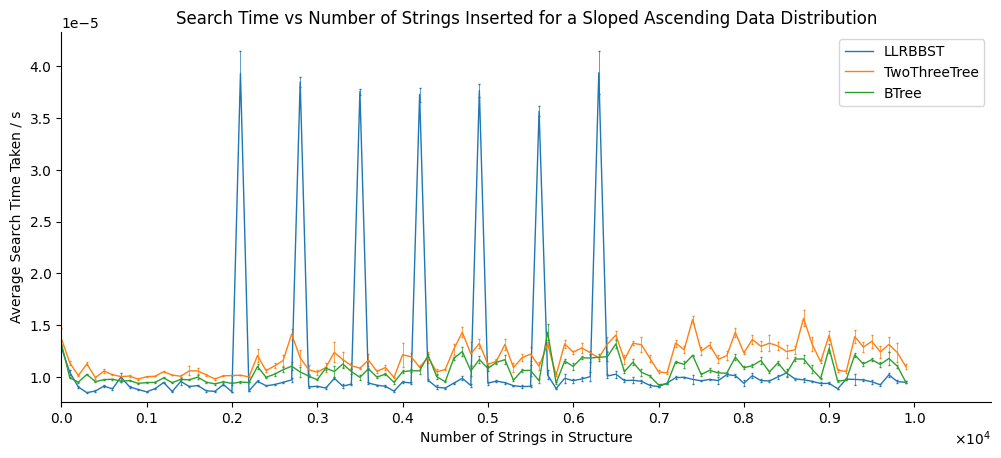

In [ ]:
gen_uni = UniformTestDataGenerator(3, 9, 666, 62)
gen_srt_asc = SortedTestDataGenerator(3, 9, 666, 62, ascending=True)
# gen_srt_desc = SortedTestDataGenerator(3, 9, 666, 62, ascending=False)
gen_slope_asc = SlopedTestDataGenerator(3, 9, 666, 62, ascending=True)
gen_slope_desc = SlopedTestDataGenerator(3, 9, 666, 62, ascending=False)
gen_dvrg = DivergingTestDataGenerator(3, 9, 666, 62)

repeats = 10


def uniform_cumulative_insertion_test(num_str, step, trees):
    num_strs = [x for x in range(1, num_str + 1, 1000)]

    test_results = [ExperimentalFramework.run_cumulative_insertion_experiment(
        num_strs, repeats, gen_uni, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Cumulative Insertion",
        data_generation_type="Uniform", x_tick_spacing=step)

def asc_sorted_cumulative_insertion_test(num_str, step, trees):
    num_strs = [x for x in range(1, num_str + 1, 1000)]

    test_results = [ExperimentalFramework.run_cumulative_insertion_experiment(
        num_strs, repeats, gen_srt_asc, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Cumulative Insertion",
        data_generation_type="Ascending Sorted", x_tick_spacing=step)
    
def slope_asc_sorted_cumulative_insertion_test(num_str, step, trees):
    num_strs = [x for x in range(1, num_str + 1, 1000)]

    test_results = [ExperimentalFramework.run_cumulative_insertion_experiment(
        num_strs, repeats, gen_slope_asc, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Cumulative Insertion",
        data_generation_type="Sloped Ascending", x_tick_spacing=step)
    
def slope_desc_sorted_cumulative_insertion_test(num_str, step, trees):
    num_strs = [x for x in range(1, num_str + 1, 1000)]

    test_results = [ExperimentalFramework.run_cumulative_insertion_experiment(
        num_strs, repeats, gen_slope_desc, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Cumulative Insertion",
        data_generation_type="Sloped Descending", x_tick_spacing=step)

def diverging_cumulative_insertion_test(num_str, step, trees):
    num_strs = [x for x in range(1, num_str + 1, 1000)]

    test_results = [ExperimentalFramework.run_cumulative_insertion_experiment(
        num_strs, repeats, gen_dvrg, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Cumulative Insertion",
        data_generation_type="Diverging", x_tick_spacing=step)



def uniform_insertion_test():
    num_str = 10_000
    num_strs = [x for x in range(1, num_str + 1, 1)]

    test_results = [ExperimentalFramework.run_insertion_experiment(
        num_str, repeats, gen_uni, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Insertion",
        data_generation_type="Uniform", x_tick_spacing=num_str//10)

def asc_sorted_insertion_test():
    num_str = 10_000
    num_strs = [x for x in range(1, num_str + 1, 1)]

    test_results = [ExperimentalFramework.run_insertion_experiment(
        num_str, repeats, gen_srt_asc, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Insertion",
        data_generation_type="Ascending Sorted", x_tick_spacing=num_str//10)
    
def slope_asc_sorted_insertion_test():
    num_str = 10_000
    num_strs = [x for x in range(1, num_str + 1, 1)]

    test_results = [ExperimentalFramework.run_insertion_experiment(
        num_str, repeats, gen_slope_asc, tree) for tree in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Insertion",
        data_generation_type="Sloped Ascending", x_tick_spacing=num_str//10)


def uniform_search_test(num_str, step, trees, srch_gen):
    num_strs = [x for x in range(0, num_str, step)]

    test_results = [ExperimentalFramework.run_search_experiment(
        num_str, repeats, gen_uni, srch_gen, tree, step) for tree 
        in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Search", 
        data_generation_type="Uniform", x_tick_spacing=step*10)

def asc_sorted_search_test(num_str, step, trees, srch_gen):
    num_strs = [x for x in range(0, num_str, step)]

    test_results = [ExperimentalFramework.run_search_experiment(
        num_str, repeats, gen_srt_asc, srch_gen, tree, step) for tree 
        in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Search",
        data_generation_type="Sorted Ascending", x_tick_spacing=step*10)

def slope_asc_sorted_search_test(num_str, step, trees, srch_gen):
    num_strs = [x for x in range(0, num_str, step)]

    test_results = [ExperimentalFramework.run_search_experiment(
        num_str, repeats, gen_slope_asc, srch_gen, tree, step) for tree 
        in trees]
    
    ExperimentalFramework.plot_experiment_results(
        test_results, trees, num_strs, test_type="Search",
        data_generation_type="Sloped Ascending", x_tick_spacing=step*10)



if __name__ == "__main__":
    trees = [LLRBBST, TwoThreeTree, BTree]
    num_str = 100_000
    step = num_str // 10
    # uniform_cumulative_insertion_test(num_str, step, trees)
    # asc_sorted_cumulative_insertion_test(num_str, step, trees)
    # slope_asc_sorted_cumulative_insertion_test(num_str, step, trees)
    # slope_desc_sorted_cumulative_insertion_test(num_str, step, trees)
    # diverging_cumulative_insertion_test(num_str, step, trees)

    # gave slope a desc a go to see if spike happens or different

    # uniform_insertion_test()
    # asc_sorted_insertion_test()
    # slope_asc_sorted_insertion_test()


    
    srch_gen_uni = UniformTestDataGenerator(3, 12, 69, 62)
    # srch_gen_srt = UniformTestDataGenerator(3, 12, 69, 62)
    # srch_gen_slope = UniformTestDataGenerator(3, 12, 69, 62)
    
    # The search generators for all of these are uniform random, using a
    # different seed to the insertion generators, which allows worst 
    # case measurements to be taken most frequently and the string keys
    # aren't just at the inserted key's endpoints (all greater than or 
    # smaller than). There was no noticeable difference to using 
    # different search generators.

    num_str = 10_000
    step =  num_str // 100
    uniform_search_test(num_str, step, trees, srch_gen_uni)
    asc_sorted_search_test(num_str, step, trees, srch_gen_uni)
    slope_asc_sorted_search_test(num_str, step, trees, srch_gen_uni)
    
